In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [4]:
df.describe()

,Label
count,4009.000000
mean,0.466949
std,0.498969
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
#Replace the missing columns with absent
df = df.fillna('Article Unavailable')

In [13]:
#extracting the features and the target variable
X = np.array(df['Body'], df['URLs'])

In [14]:
y = np.array(df['Label'])

In [15]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [16]:
y = list(map(int, y))

In [17]:
#Splitting the data into folds
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 2)
kf.get_n_splits(X)

2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [19]:
#ignore this iteration
X_train = list(X_train)
new_X_train = []
for i in X_train:
    for j in i:
        new_X_train.append(j)

In [20]:
#ignore this iteration
X_test = list(X_test)
new_X_test = []
for i in X_test:
    for j in i:
        new_X_test.append(j)

In [21]:
#Extract the features from the body using the tfidf vectorizer
tfidf_vec = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
t_train = tfidf_vec.fit_transform(X_train)
t_test = tfidf_vec.transform(X_test)

In [22]:
#using the Logistic Regression classifier
lr = LogisticRegression()
lr.fit(t_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr_pred = lr.predict(t_test)
lr_pred

array([0, 0, 1, ..., 1, 0, 0])

In [24]:
lr_score = lr.score(t_test, y_test)
print('accuracy: %0.3f' % lr_score)

accuracy: 0.971


In [25]:
#plotting the confusion matrix
cml = confusion_matrix(y_test, lr_pred)
cml

array([[666,  31],
       [  8, 618]])

Text(69.0, 0.5, 'Truth')

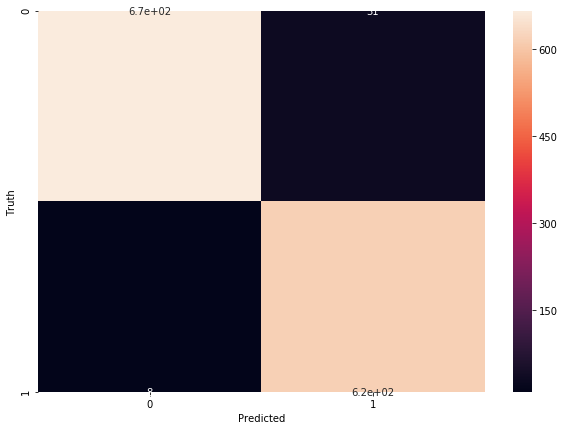

In [26]:
#using seaborn to visualize how well the model is working
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cml, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
#using the Support Vector Machine
sv = SVC()
sv.fit(t_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
sv_pred = sv.predict(t_test)

In [29]:
sv.score(t_test, y_test)

0.526832955404384

In [30]:
#plotting the confusion matrix
cms = confusion_matrix(y_test, sv_pred)
cms

array([[697,   0],
       [626,   0]])

Text(69.0, 0.5, 'Truth')

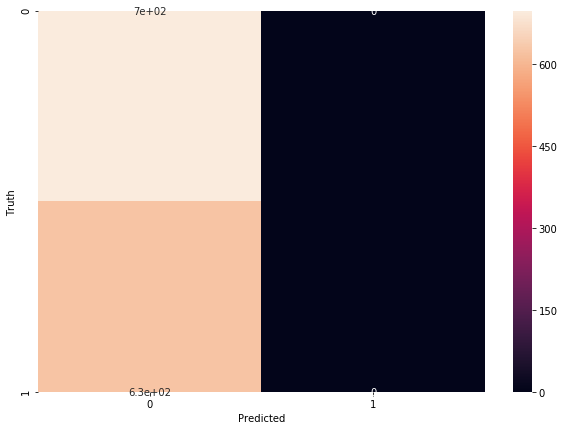

In [31]:
#using seaborn to visualize model performance for the svm
plt.figure(figsize = (10, 7))
sn.heatmap(cms, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [32]:
#using the RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(t_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
rf_pred = rf.predict(t_test)

In [34]:
rf.score(t_test, y_test)

0.9433106575963719

In [35]:
#plotting the confusion matrix
cmr = confusion_matrix(y_test, rf_pred)
cmr

array([[645,  52],
       [ 23, 603]])

Text(69.0, 0.5, 'Truth')

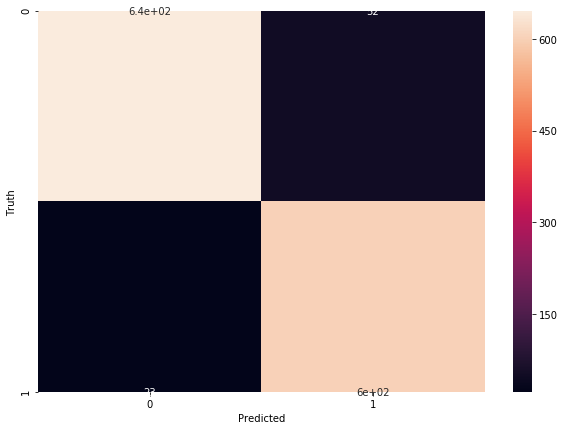

In [36]:
#using seaborn to visualize model performance for the random forest classifier
plt.figure(figsize = (10, 7))
sn.heatmap(cmr, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')